<a href="https://colab.research.google.com/github/crqcastro/undb_datamining/blob/master/Aula03_regressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import os


In [9]:
df = pd.read_csv('Advertising.csv')

In [11]:
  df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
df.shape

(200, 5)

In [16]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [18]:
df[u'TV'].value_counts()

197.6    2
237.4    2
177.0    2
76.4     2
222.4    2
        ..
18.8     1
19.4     1
26.8     1
139.2    1
44.5     1
Name: TV, Length: 190, dtype: int64

In [20]:
nTbl = df.drop(['Unnamed: 0'], axis=1)

In [23]:
nTbl.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5, 1.0, ' Conversao ')

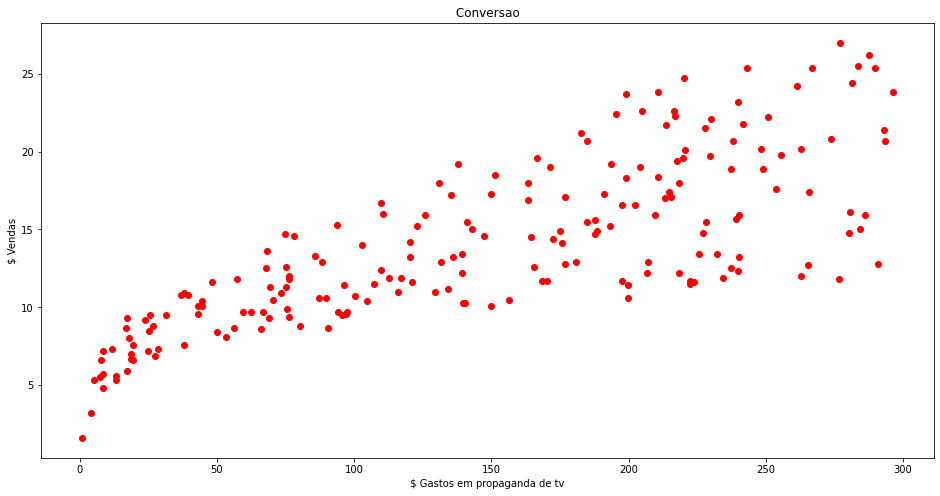

In [30]:
# grafico scatter
plt.figure(figsize=(16,8))
plt.scatter(nTbl['TV'], nTbl['sales'], c='red')
plt.xlabel(' $ Gastos em propaganda de tv ')
plt.ylabel(' $ Vendas ')
plt.title(' Conversao ')


In [36]:
# Gerar o modelo para prever o queanto teremos de retorno com o anuncio de tv
x = nTbl['TV'].values.reshape(-1,1)
y = nTbl['sales'].values.reshape(-1,1)  

reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print("o modelo é: Vendas = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

o modelo é: Vendas = 7.0326 + 0.047537X


Text(0.5, 1.0, ' Conversao ')

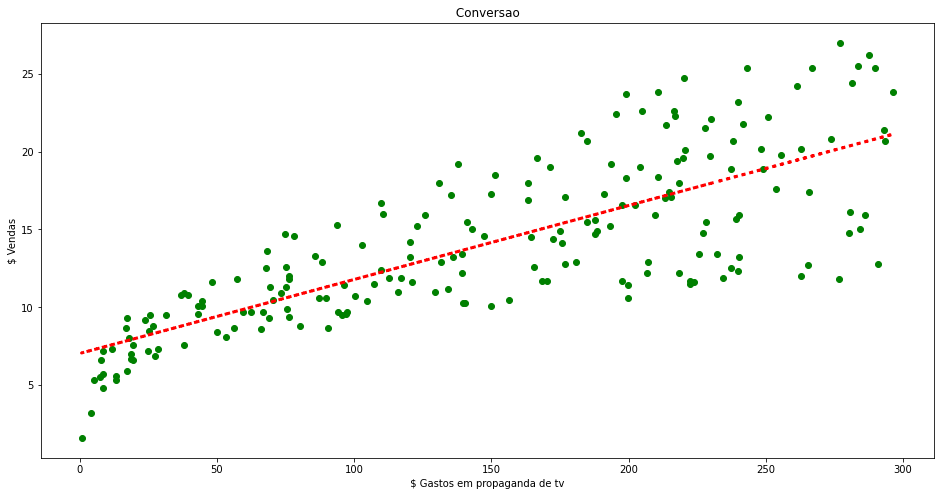

In [45]:
# plotar o modelo com a reta
f_previsoes = reg.predict(x)

plt.figure(figsize=(16,8))
plt.scatter(nTbl['TV'], nTbl['sales'], c='green')
plt.plot(nTbl['TV'], f_previsoes, c='red', linewidth=3, linestyle=':')
plt.xlabel(' $ Gastos em propaganda de tv ')
plt.ylabel(' $ Vendas ')
plt.title(' Conversao ')